An exacerbation's start can be spotted by the pattern [False, True] in Is Exacerbated. Similarly, it's [True, False] for an exacerbation's end.

Functions exported to `ex_labels_data.py`

In [1]:
import ex_labels_data
import numpy as np
import pandas as pd
import O2_FEV1_df
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
O2_FEV1 = O2_FEV1_df.create()
ex_labels = ex_labels_data.load()
O2_FEV1_with_ex_labels = ex_labels_data.inner_merge_with(
    O2_FEV1, ex_labels, exclude_no_ex=True
)
O2_FEV1_with_ex_labels.head()


** Loading measurements data **

* Dropping unnecessary columns from measurements data *
Columns filtered ['User ID', 'UserName', 'Recording Type', 'Date/Time recorded', 'FEV 1', 'Weight in Kg', 'O2 Saturation', 'Pulse (BPM)', 'Rating', 'Temp (deg C)']
Dropping columns {'Activity - Steps', 'Calories', 'Sputum sample taken?', 'Predicted FEV', 'FEV 10', 'Activity - Points', 'FEV 1 %'}

* Renaming columns *
Renamed columns {'Date/Time recorded': 'Date recorded', 'FEV 1': 'FEV1', 'Weight in Kg': 'Weight (kg)'}


/Users/tristan.trebaol/Desktop/PhD/Code/phd/src/data/measurements_data.py:101: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(datadir + "mydata.csv")



* Applying data sanity checks *

FEV1
Dropping 1 entries with FEV1 = 3.45 for user Kings004

Weight (kg)
Dropping 2 entries with Weight (kg) = 6.0 for user Papworth033
Dropping 1 entries with Weight (kg) = 0.55 for user Kings013
Dropping 1 entries with Weight (kg) = 8.262500000000001 for user Papworth017
Dropping 1 entries with Weight (kg) = 1056.0 for user leeds01730
Dropping 1 entries with Weight (kg) = 20.0 for user Papworth019
Warning - ID PapworthSummer has Weight (28.9375) outside 30-122 kg range
Warning - ID PapworthSummer has Weight (29.200000000000003) outside 30-122 kg range
Warning - ID EmemTest has Weight (14.9625) outside 30-122 kg range
Warning - ID FPH0011 has Weight (7.8) outside 30-122 kg range

Pulse (BPM)
Dropping 14 entries with Pulse (BPM) == 511)
       Pulse (BPM)      UserName
60638        511.0   Papworth002
60989        511.0   Papworth001
61026        511.0    leeds01050
61374        511.0    leeds01320
63126        511.0      Kings005
63525        511.0    

/Applications/anaconda3/envs/phd/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/tristan.trebaol/Desktop/PhD/Code/phd/src/data/patient_data.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Height.loc[df.ID == "60"] = tmp * 100
/Applications/anaconda3/envs/phd/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():



* Dropping unnecessary columns from antibiotics data *
Columns filetered: ['ID', 'Antibiotic Name', 'Route', "Home IV's'", 'Start Date', 'Stop Date']
Columns dropped: {'Study Number', 'Antibiotic ID', 'Hospital'}

** Creating DataFrame for O2 FEV1 analysis **
O2 Saturation has 14011 measurements
FEV1 has 9936 measurements
Merged O2 and FEV1 into 9526 entries (initially 14421, removed 4895 NaN)
Asserting that there's only one measurement per ID per day

Created df_O2_FEV1 with 9526 entries (initially 14421, removed 4895)

** Loading exacerbation labels from the predictive classifier **
Initially: 14452 entries (1445 True, 13006 False)
Excluding 1 NaN entry
Finally: 14451 entries (1445 True, 13006 False)

** Inner merge of O2_FEV1 and exacerbated labels on 'ID' and 'Date recorded' **
Data has now 7994 entries and 103 IDs (initially 9526 & 146 in O2_FEV1, 14451 in pred_ex_labels)
Keeping 53/103 individuals that have one or more measurements during an exacerbated period (Is Exacerbated ==

,ID,Date recorded,O2 Saturation,FEV1,Study Date,DOB,Age,Sex,Height,Weight,Predicted FEV1,FEV1 % Predicted,Is Exacerbated
0,23,2015-08-12,95.0,1.49,2015-08-03,1960-07-05,55,Female,157.0,63.4,2.2265,66.921177,False
2,23,2015-08-14,95.0,1.29,2015-08-03,1960-07-05,55,Female,157.0,63.4,2.2265,57.938468,False
3,23,2015-08-21,94.0,1.35,2015-08-03,1960-07-05,55,Female,157.0,63.4,2.2265,60.633281,False
4,137,2015-08-26,95.0,1.28,2015-08-25,1976-05-24,39,Female,172.0,61.0,3.2190,39.763902,False
7,24,2015-08-28,98.0,2.55,2015-08-06,1990-11-25,25,Female,166.0,74.2,3.3320,76.530612,False


In [3]:
test_df = ex_labels[ex_labels.ID == "241"].copy()
test_df = ex_labels_data.mark_ex_transition_period(test_df)
test_df.iloc[30:41]

** Marking transition period around exacerbation start **
Initially:
False    37
True     10
Name: Is Exacerbated, dtype: int64
Finally:
0.0    35
1.0     7
0.5     5
Name: Exacerbation State, dtype: int64


,index,PatientNbr,Study,ID,CalcDate,CalcDatedn,ScenType,Scenario,BaseExample,Measure,Frequency,Percentage,MSExample,Is Exacerbated,Date recorded,Exacerbation State
30,14434,104,SC,241,08-Apr-2016,31,0,Actual,0,NaN,0,0,0,False,2016-04-08,0.0
31,14435,104,SC,241,09-Apr-2016,32,0,Actual,0,NaN,0,0,0,False,2016-04-09,0.0
32,14436,104,SC,241,10-Apr-2016,33,0,Actual,0,NaN,0,0,0,False,2016-04-10,0.0
33,14437,104,SC,241,11-Apr-2016,34,0,Actual,0,NaN,0,0,0,False,2016-04-11,0.0
34,14438,104,SC,241,12-Apr-2016,35,0,Actual,0,NaN,0,0,0,False,2016-04-12,0.0
35,14439,104,SC,241,13-Apr-2016,36,0,Actual,0,NaN,0,0,0,False,2016-04-13,0.5
36,14440,104,SC,241,14-Apr-2016,37,0,Actual,0,NaN,0,0,0,False,2016-04-14,0.5
37,14441,104,SC,241,15-Apr-2016,38,0,Actual,0,NaN,0,0,0,True,2016-04-15,0.5
38,14442,104,SC,241,16-Apr-2016,39,0,Actual,0,NaN,0,0,0,True,2016-04-16,0.5
39,14443,104,SC,241,17-Apr-2016,40,0,Actual,0,NaN,0,0,0,True,2016-04-17,0.5


# Visualization of the transition period
Issues
- [Solved] not sorted by dates
- [Solved] the transition period should be marked by number of days around the start date, not by a certain amount of indices to the right and to the left

** Marking transition period around exacerbation start **
Initially:
False    3269
True      723
Name: Is Exacerbated, dtype: int64
Finally:
0.0    3194
1.0     585
0.5     213
Name: Exacerbation State, dtype: int64


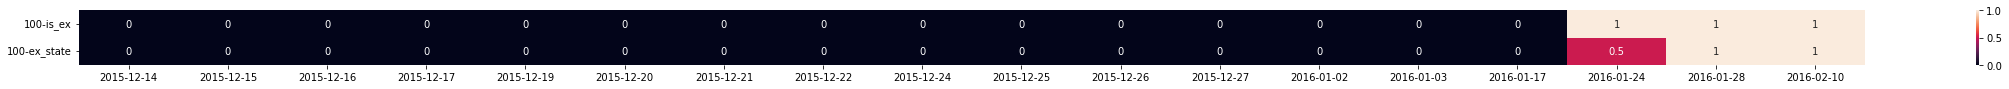

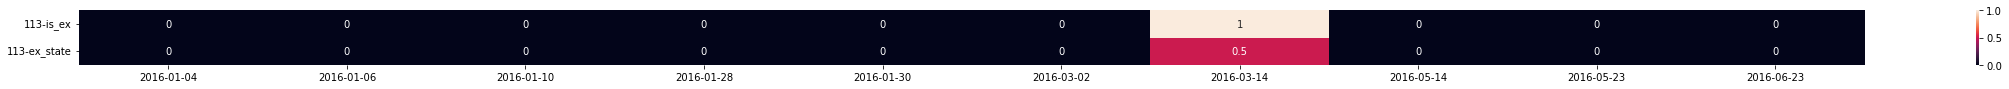

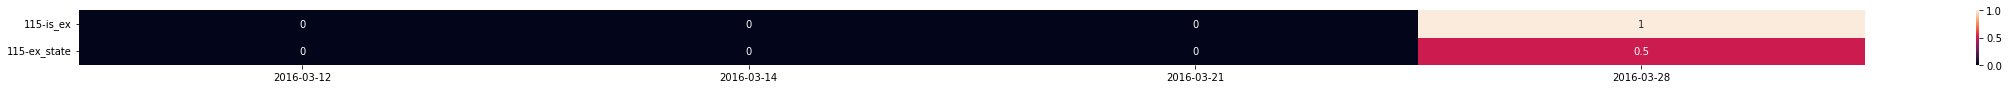

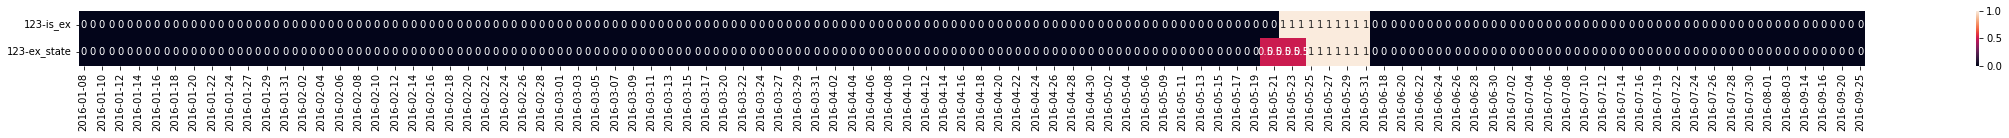

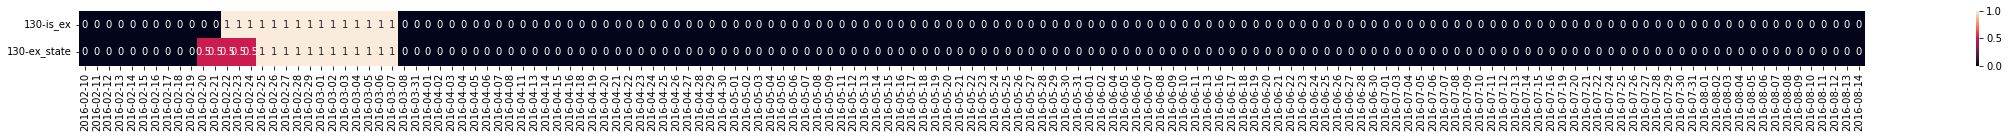

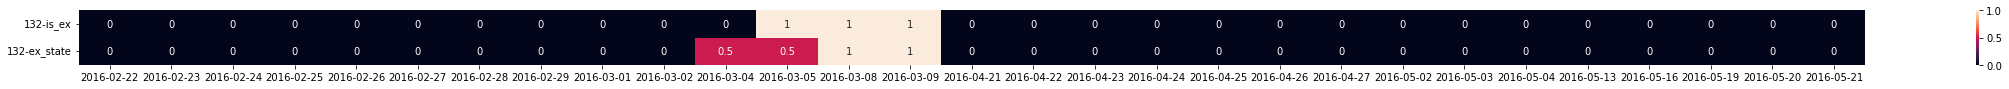

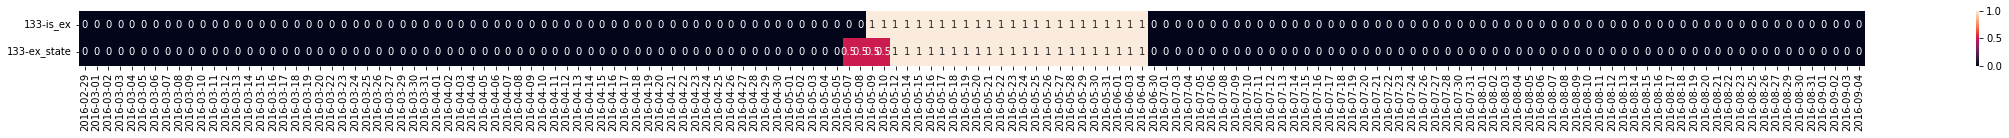

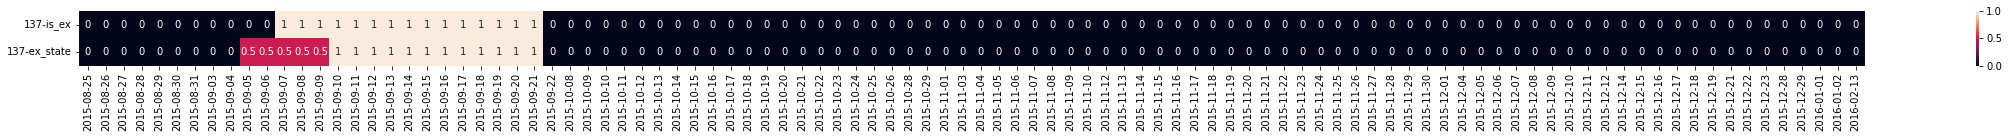

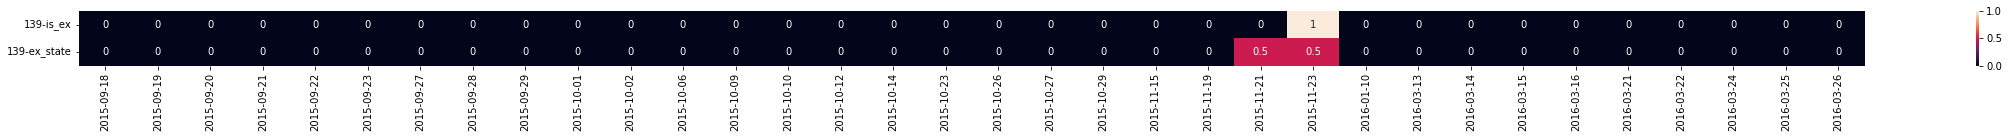

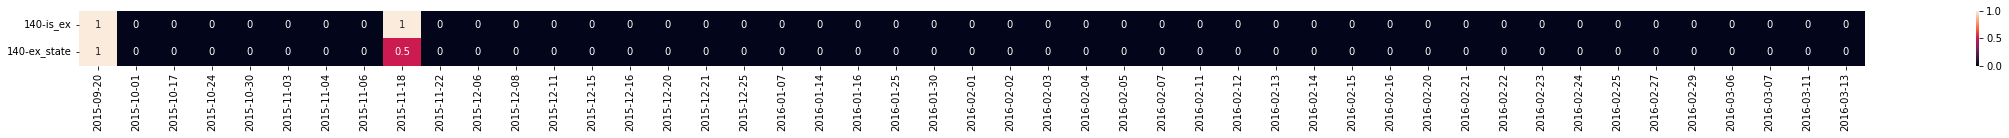

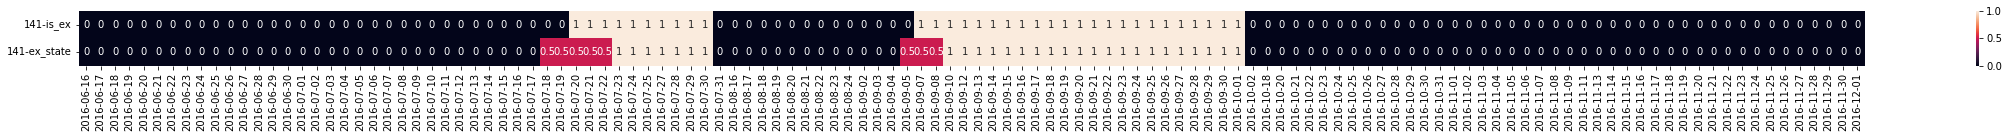

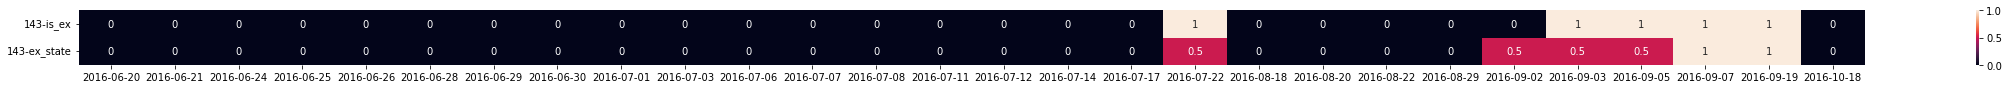

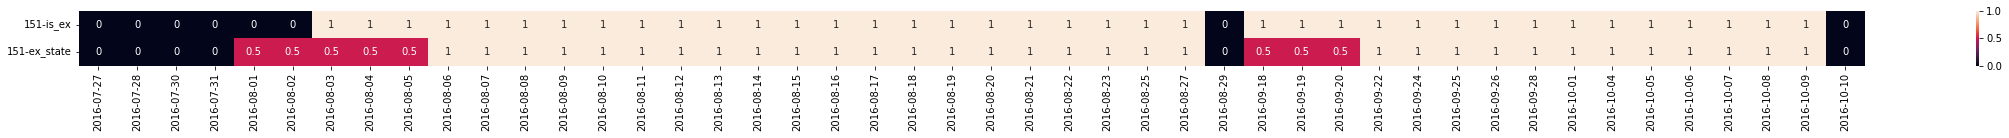

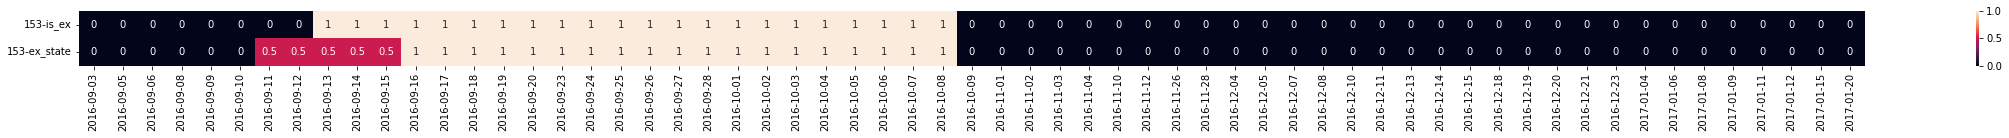

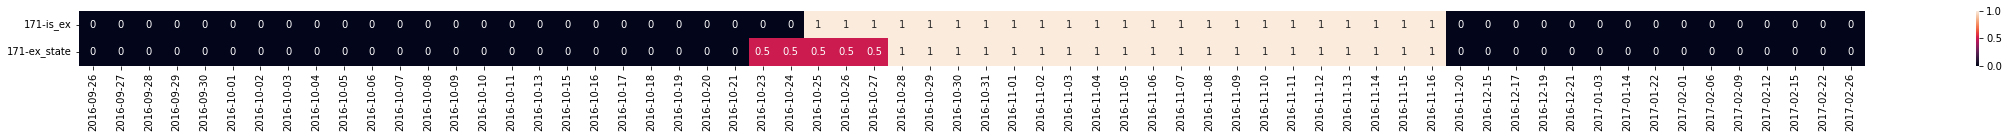

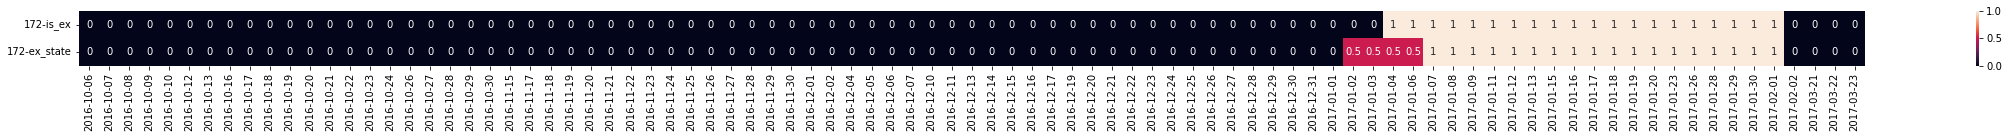

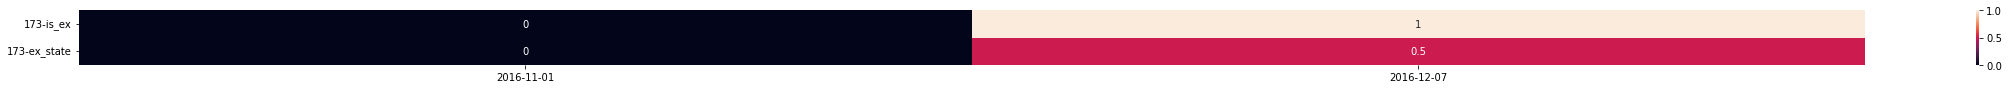

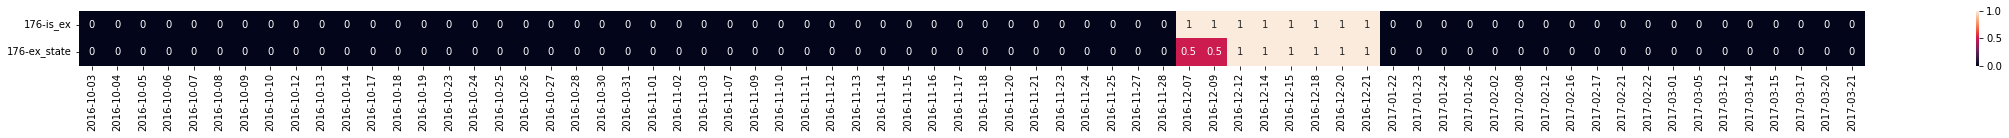

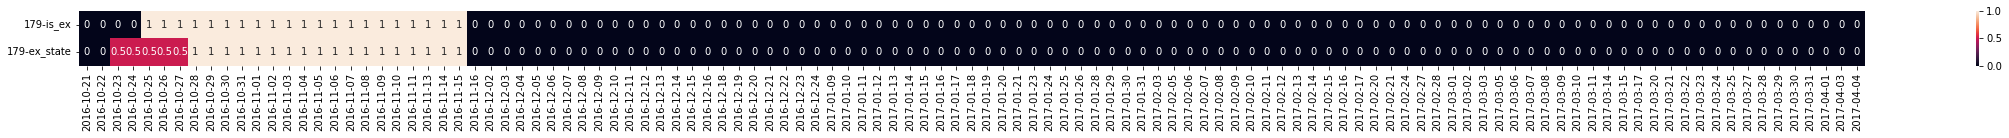

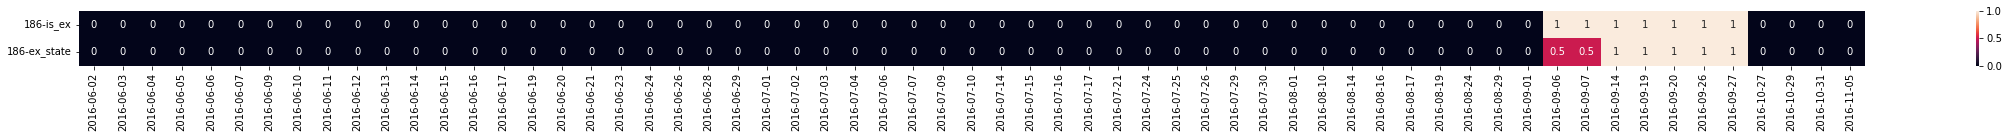

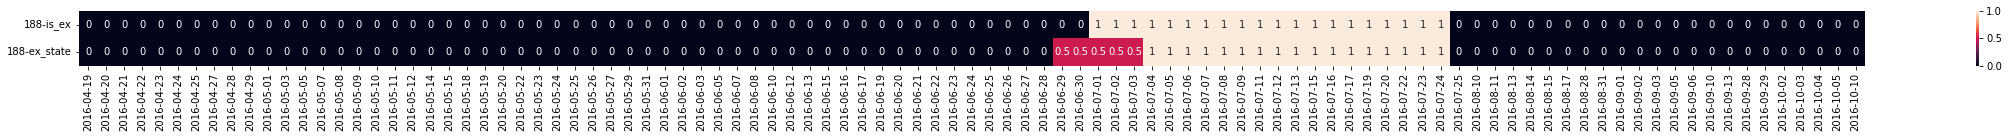

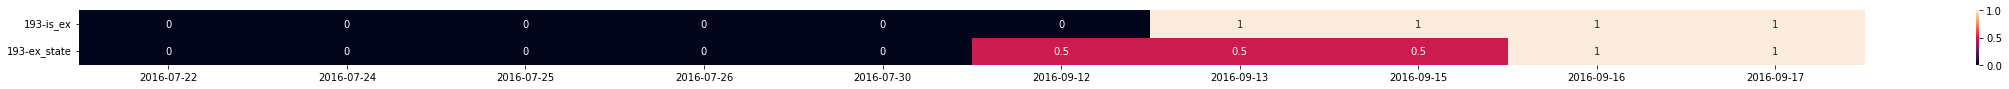

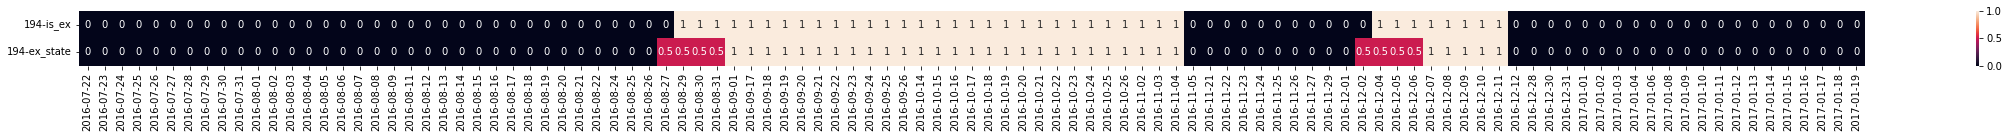

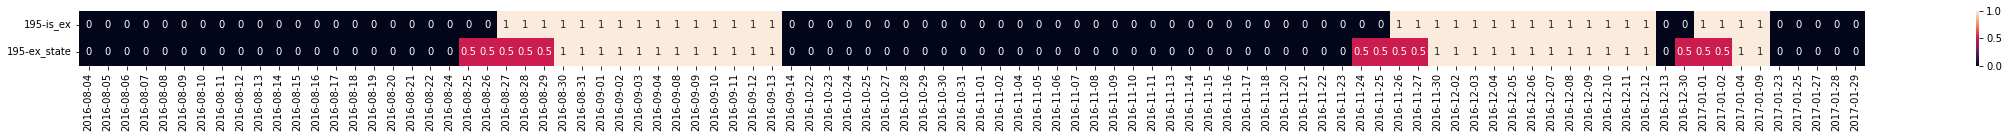

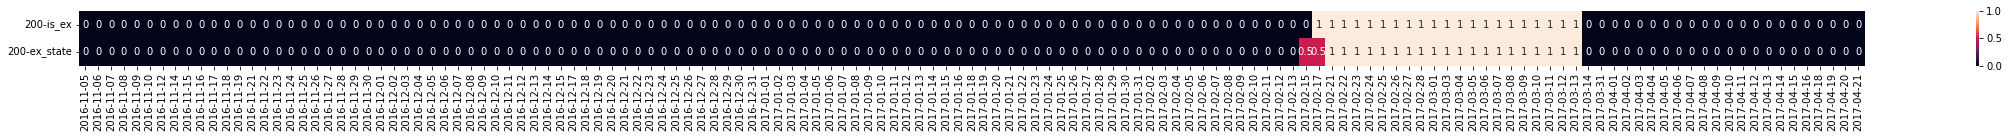

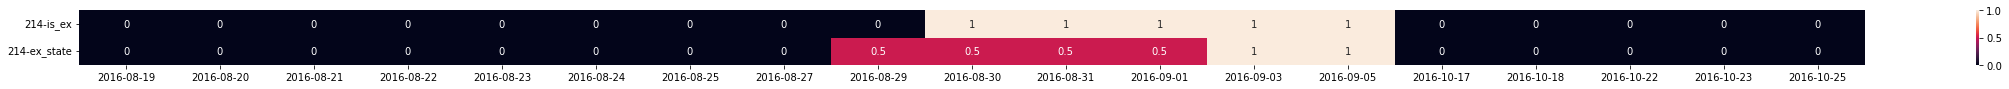

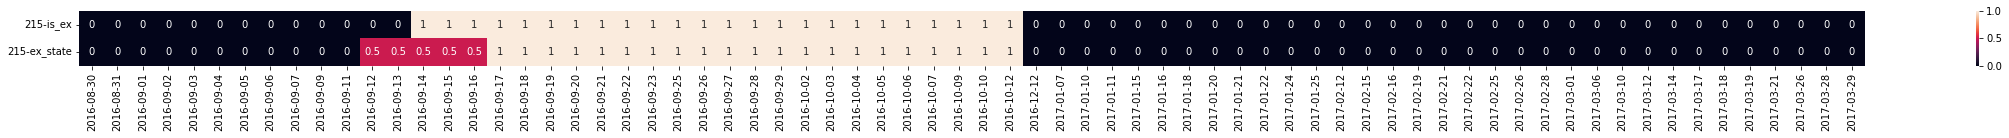

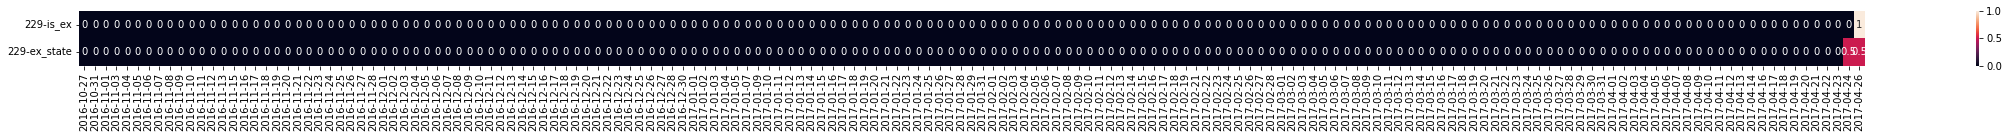

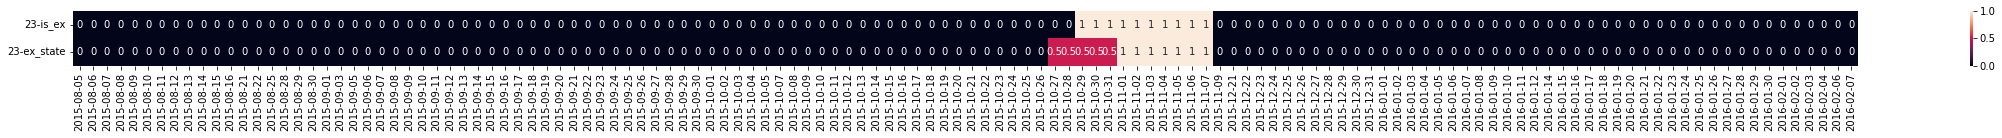

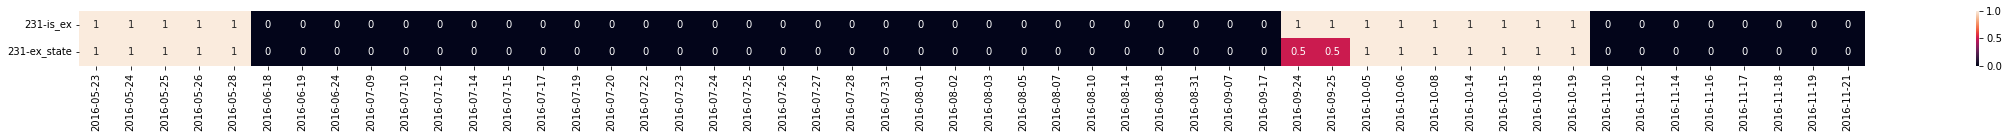

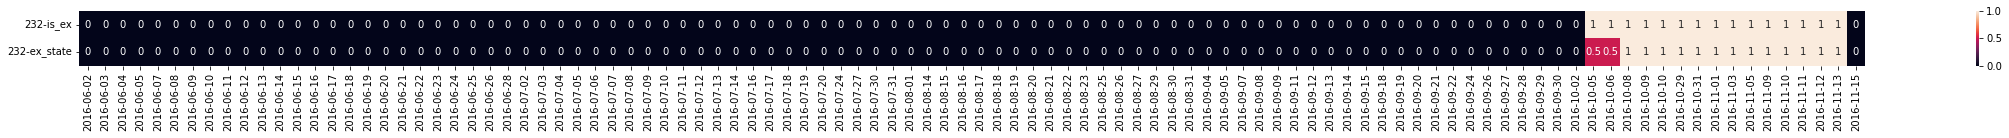

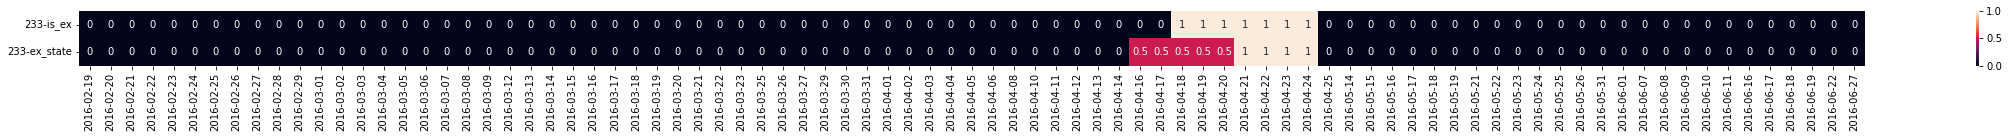

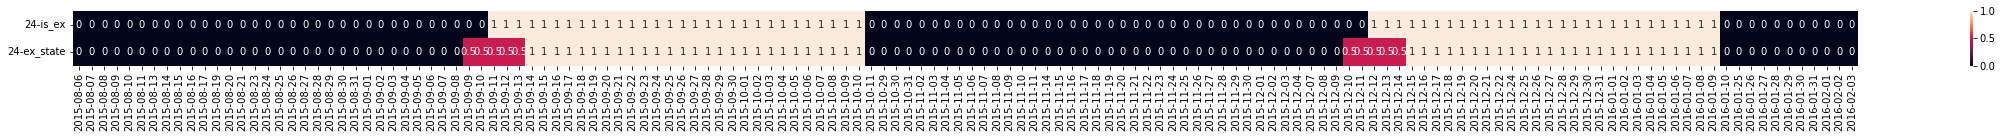

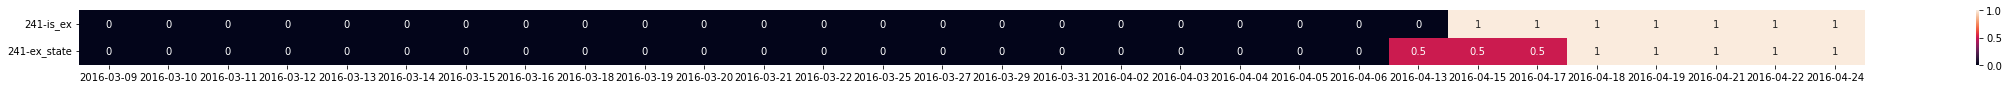

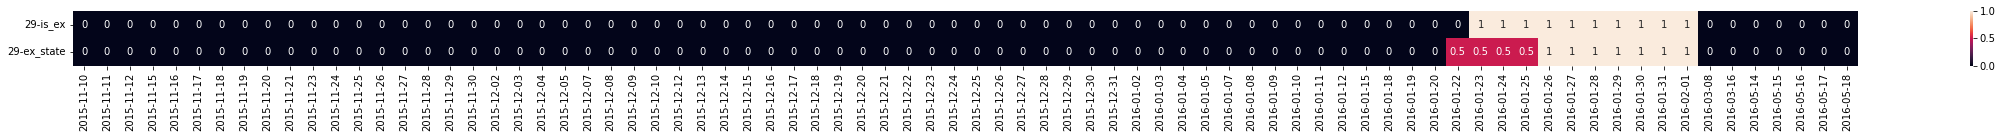

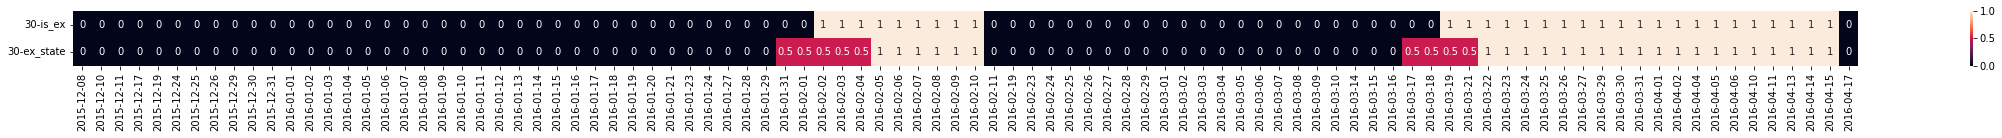

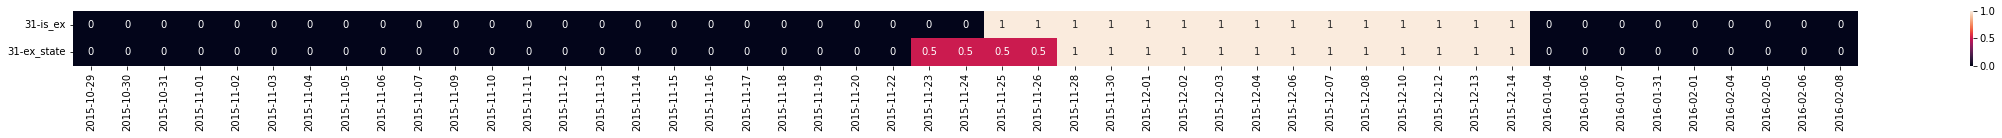

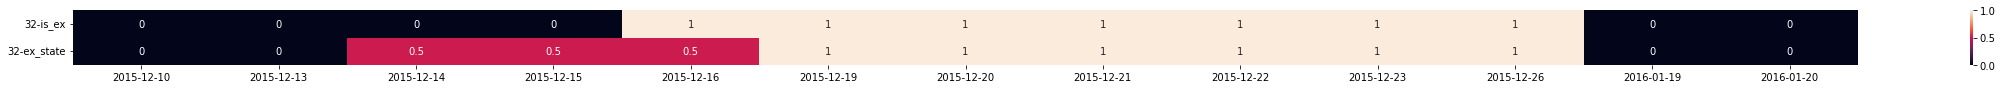

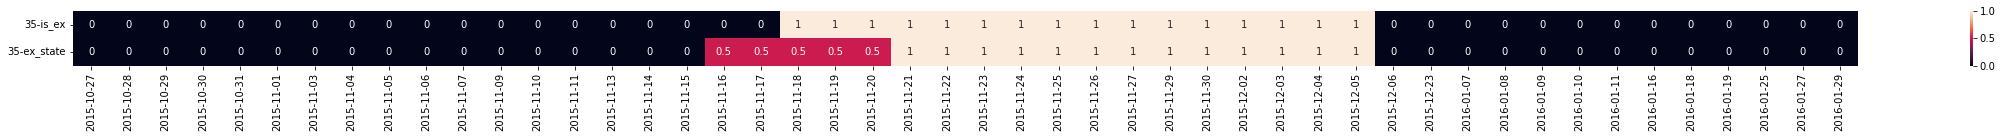

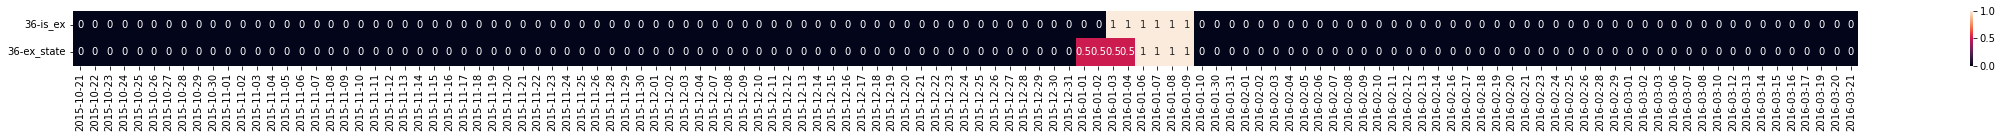

In [7]:
df_transition = ex_labels_data.mark_ex_transition_period(
    O2_FEV1_with_ex_labels, n_days_before=2, n_days_after=2
)

for id in df_transition.ID.unique()[0:40]:
    df_for_ID = df_transition[df_transition.ID == id].copy().reset_index(drop=True)
    df_heatmap = pd.DataFrame(
        np.array(
            [
                df_for_ID["Is Exacerbated"].astype(int),
                df_for_ID["Exacerbation State"].astype(float),
            ]
        ),
        index=[f"{id}-is_ex", f"{id}-ex_state"],
        columns=df_for_ID["Date recorded"].to_numpy(),
    )

    # change fig size
    plt.figure(figsize=(40, 1))
    sns.heatmap(df_heatmap, annot=True)
    plt.show()

In [6]:
df_transition.ID.unique()


array(['100', '113', '115', '123', '130', '132', '133', '137', '139',
       '140', '141', '143', '151', '153', '171', '172', '173', '176',
       '179', '186', '188', '193', '194', '195', '200', '214', '215',
       '229', '23', '231', '232', '233', '24', '241', '29', '30', '31',
       '32', '35', '36', '38', '39', '42', '45', '58', '59', '66', '69',
       '70', '71', '78', '79', '92'], dtype=object)